In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [4]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [5]:
df.head().transpose()

,0,1,2,3,4
loan_amnt,10000.0,8000.0,15600.0,7200.0,24375.0
term,36 months,36 months,36 months,36 months,60 months
int_rate,11.44,11.99,10.49,6.49,17.27
installment,329.48,265.68,506.97,220.65,609.33
grade,B,B,B,A,C
sub_grade,B4,B5,B3,A2,C5
emp_title,Marketing,Credit analyst,Statistician,Client Advocate,Destiny Management Inc.
emp_length,10+ years,4 years,< 1 year,6 years,9 years
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE
annual_inc,117000.0,65000.0,43057.0,54000.0,55000.0


In [6]:
df['term'] = df['term'].apply(lambda x : int(x.split()[0])) # cut off months

In [7]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [8]:
df['address'] = df['address'].apply(lambda address: address[-5:]) # only zipcodes

In [9]:
verify_stat = pd.get_dummies(df['verification_status'],drop_first=True)
app_type = pd.get_dummies(df['application_type'],drop_first=True)
init_list_stat = pd.get_dummies(df['initial_list_status'],drop_first=True)
loan_stat = pd.get_dummies(df['loan_status'],drop_first=True)
purpose = pd.get_dummies(df['purpose'],drop_first=True)
home_ownership = pd.get_dummies(df['home_ownership'],drop_first=True)
# grade = pd.get_dummies(df['grade'],drop_first=True)
sub_grade = pd.get_dummies(df['sub_grade'],drop_first=True)
address = pd.get_dummies(df['address'],drop_first=True)

df = pd.concat([df.drop(['verification_status','application_type',
                         'initial_list_status','loan_status','purpose','home_ownership','grade','sub_grade','address'],
                        axis=1),
                verify_stat,app_type,init_list_stat,loan_stat,purpose,home_ownership,sub_grade,address],
               axis=1)

df.head().transpose()

,0,1,2,3,4
loan_amnt,10000.0,8000.0,15600.0,7200.0,24375.0
term,36,36,36,36,60
int_rate,11.44,11.99,10.49,6.49,17.27
installment,329.48,265.68,506.97,220.65,609.33
emp_title,Marketing,Credit analyst,Statistician,Client Advocate,Destiny Management Inc.
...,...,...,...,...,...
30723,0,0,0,0,0
48052,0,0,0,0,0
70466,0,0,0,0,0
86630,0,0,0,0,0


In [10]:
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

In [11]:
df['issue_year'] = df['issue_d'].apply(lambda date : date.year)
df['issue_month'] = df['issue_d'].apply(lambda date : date.month)
df['earliest_cr_line_year'] = df['earliest_cr_line'].apply(lambda date : date.year)
df['earliest_cr_line_month'] = df['earliest_cr_line'].apply(lambda date : date.month)

In [12]:
df.head().transpose()

,0,1,2,3,4
loan_amnt,10000.0,8000.0,15600.0,7200.0,24375.0
term,36,36,36,36,60
int_rate,11.44,11.99,10.49,6.49,17.27
installment,329.48,265.68,506.97,220.65,609.33
emp_title,Marketing,Credit analyst,Statistician,Client Advocate,Destiny Management Inc.
...,...,...,...,...,...
93700,0,0,0,0,0
issue_year,2015,2015,2015,2014,2013
issue_month,1,1,1,11,4
earliest_cr_line_year,1990,2004,2007,2006,1999


In [13]:
df = df.drop(['issue_d','earliest_cr_line','emp_length','emp_title','title'],axis=1)

In [14]:
df.head().transpose()

,0,1,2,3,4
loan_amnt,10000.00,8000.00,15600.00,7200.00,24375.00
term,36.00,36.00,36.00,36.00,60.00
int_rate,11.44,11.99,10.49,6.49,17.27
installment,329.48,265.68,506.97,220.65,609.33
annual_inc,117000.00,65000.00,43057.00,54000.00,55000.00
...,...,...,...,...,...
93700,0.00,0.00,0.00,0.00,0.00
issue_year,2015.00,2015.00,2015.00,2014.00,2013.00
issue_month,1.00,1.00,1.00,11.00,4.00
earliest_cr_line_year,1990.00,2004.00,2007.00,2006.00,1999.00


In [15]:
df['loan_status'] = df['Fully Paid']
df = df.drop('Fully Paid',axis=1)

In [16]:
# dealing with nan
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [17]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [18]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [19]:
df = df.dropna()

In [20]:
df.head().transpose()

,0,1,2,3,4
loan_amnt,10000.00,8000.00,15600.00,7200.00,24375.00
term,36.00,36.00,36.00,36.00,60.00
int_rate,11.44,11.99,10.49,6.49,17.27
installment,329.48,265.68,506.97,220.65,609.33
annual_inc,117000.00,65000.00,43057.00,54000.00,55000.00
...,...,...,...,...,...
issue_year,2015.00,2015.00,2015.00,2014.00,2013.00
issue_month,1.00,1.00,1.00,11.00,4.00
earliest_cr_line_year,1990.00,2004.00,2007.00,2006.00,1999.00
earliest_cr_line_month,6.00,7.00,8.00,9.00,3.00


In [21]:
X = df.drop('loan_status',axis=1).values
y = df['loan_status'].values

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()

In [26]:
X_train = scaler.fit_transform(X_train)

In [27]:
X_test = scaler.transform(X_test)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [30]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5)) # rate is the probability that you will randomly turn off a neuron
# 0.5 means that half of the neurons will be turned off randomly during each batch

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

# sigmoid because this is binary classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [31]:
model.fit(x=X_train,y=y_train,epochs=25,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/25
9263/9263 [==============================] - 9s 969us/step - loss: 0.3134 - val_loss: 0.2688
Epoch 2/25
9263/9263 [==============================] - 11s 1ms/step - loss: 0.2763 - val_loss: 0.2674
Epoch 3/25
9263/9263 [==============================] - 9s 996us/step - loss: 0.2735 - val_loss: 0.2691
Epoch 4/25
9263/9263 [==============================] - 10s 1ms/step - loss: 0.2730 - val_loss: 0.2686
Epoch 5/25
9263/9263 [==============================] - 10s 1ms/step - loss: 0.2720 - val_loss: 0.2664
Epoch 6/25
9263/9263 [==============================] - 10s 1ms/step - loss: 0.2719 - val_loss: 0.2671
Epoch 7/25
9263/9263 [==============================] - 10s 1ms/step - loss: 0.2722 - val_loss: 0.2655
Epoch 8/25
9263/9263 [==============================] - 10s 1ms/step - loss: 0.2718 - val_loss: 0.2655
Epoch 9/25
9263/9263 [==============================] - 10s 1ms/step - loss: 0.2719 - val_loss: 0.2651
Epoch 10/25
9263/9263 [==============================] - 10s 1ms/step -

<AxesSubplot:>

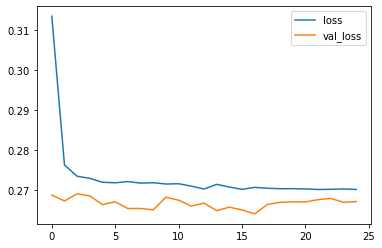

In [32]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.45      0.61     19458
           1       0.88      0.99      0.93     79347

    accuracy                           0.89     98805
   macro avg       0.92      0.72      0.77     98805
weighted avg       0.90      0.89      0.87     98805



In [36]:
confusion_matrix(y_test,predictions)

array([[ 8803, 10655],
       [  439, 78908]], dtype=int64)

In [37]:
df.transpose().head(60)

,0,1,2,3,4,5,6,7,8,9,...,396020,396021,396022,396023,396024,396025,396026,396027,396028,396029
loan_amnt,10000.00,8000.00,15600.00,7200.00,24375.00,20000.00,18000.00,13000.00,18900.00,26300.00,...,10000.00,3200.000000,12000.00,22000.00,6000.00,10000.00,21000.00,5000.00,21000.00,2000.000000
term,36.00,36.00,36.00,36.00,60.00,36.00,36.00,36.00,60.00,36.00,...,36.00,36.000000,36.00,36.00,36.00,60.00,36.00,36.00,60.00,36.000000
int_rate,11.44,11.99,10.49,6.49,17.27,13.33,5.32,11.14,10.99,16.29,...,9.76,5.420000,12.29,18.92,13.11,10.99,12.29,9.99,15.31,13.610000
installment,329.48,265.68,506.97,220.65,609.33,677.07,542.07,426.47,410.84,928.40,...,321.55,96.520000,400.24,805.55,202.49,217.38,700.42,161.32,503.02,67.980000
annual_inc,117000.00,65000.00,43057.00,54000.00,55000.00,86788.00,125000.00,46000.00,103000.00,115000.00,...,40000.00,33000.000000,52100.00,138000.00,64000.00,40000.00,110000.00,56500.00,64000.00,42996.000000
dti,26.24,22.05,12.79,2.60,33.95,16.31,1.36,26.87,12.52,23.69,...,23.40,21.450000,17.28,24.43,10.81,15.63,21.45,17.56,15.88,8.320000
open_acc,16.00,17.00,13.00,6.00,13.00,8.00,8.00,11.00,13.00,13.00,...,9.00,18.000000,6.00,18.00,7.00,6.00,6.00,15.00,9.00,3.000000
pub_rec,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
revol_bal,36369.00,20131.00,11987.00,5472.00,24584.00,25757.00,4178.00,13425.00,18637.00,22171.00,...,8819.00,3985.000000,9580.00,22287.00,11456.00,1990.00,43263.00,32704.00,15704.00,4292.000000
revol_util,41.80,53.30,92.20,21.50,69.80,100.60,4.90,64.50,32.90,82.40,...,57.30,7.600000,66.10,50.40,97.10,34.30,95.70,66.90,53.80,91.300000
